In [1]:
import v20
import defs
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

In [2]:
ctx = v20.Context(hostname=defs.HOSTNAME, token=defs.key)
ctx.set_header(key='Authorization', value=defs.key)

In [10]:
candles = ctx.instrument.candles('EUR_USD', count=100, granularity='H1', price = 'MBA').get('candles')

rows = []
for c in candles:
    c = c.dict()
    row = {}
    row['complete'] = c['complete']
    row['time'] = pd.to_datetime(c['time']).strftime('%Y-%m-%d %H:%M')
    row['volume'] = c['volume']
    for p in ['mid', 'bid', 'ask']:
        for oh in 'ohlc':
            row[f'{p}_{oh}'] = float(c[p][oh])
        rows.append(row)
df = pd.DataFrame.from_dict(rows)    
df

,complete,time,volume,mid_o,mid_h,mid_l,mid_c,bid_o,bid_h,bid_l,bid_c,ask_o,ask_h,ask_l,ask_c
0,True,2021-12-20 18:00,1509,1.12841,1.12870,1.12803,1.12810,1.12834,1.12863,1.12797,1.12803,1.12848,1.12877,1.12809,1.12816
1,True,2021-12-20 18:00,1509,1.12841,1.12870,1.12803,1.12810,1.12834,1.12863,1.12797,1.12803,1.12848,1.12877,1.12809,1.12816
2,True,2021-12-20 18:00,1509,1.12841,1.12870,1.12803,1.12810,1.12834,1.12863,1.12797,1.12803,1.12848,1.12877,1.12809,1.12816
3,True,2021-12-20 19:00,2059,1.12808,1.12861,1.12742,1.12742,1.12802,1.12854,1.12735,1.12735,1.12815,1.12868,1.12749,1.12749
4,True,2021-12-20 19:00,2059,1.12808,1.12861,1.12742,1.12742,1.12802,1.12854,1.12735,1.12735,1.12815,1.12868,1.12749,1.12749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,True,2021-12-24 20:00,869,1.13123,1.13199,1.13037,1.13170,1.13098,1.13174,1.13012,1.13145,1.13148,1.13224,1.13062,1.13195
296,True,2021-12-24 20:00,869,1.13123,1.13199,1.13037,1.13170,1.13098,1.13174,1.13012,1.13145,1.13148,1.13224,1.13062,1.13195
297,True,2021-12-24 21:00,500,1.13175,1.13286,1.13070,1.13105,1.13150,1.13236,1.13045,1.13055,1.13200,1.13336,1.13095,1.13155
298,True,2021-12-24 21:00,500,1.13175,1.13286,1.13070,1.13105,1.13150,1.13236,1.13045,1.13055,1.13200,1.13336,1.13095,1.13155


In [11]:
df['mom'] = df.mid_c.diff(10)

In [12]:
df

,complete,time,volume,mid_o,mid_h,mid_l,mid_c,bid_o,bid_h,bid_l,bid_c,ask_o,ask_h,ask_l,ask_c,mom
0,True,2021-12-20 18:00,1509,1.12841,1.12870,1.12803,1.12810,1.12834,1.12863,1.12797,1.12803,1.12848,1.12877,1.12809,1.12816,NaN
1,True,2021-12-20 18:00,1509,1.12841,1.12870,1.12803,1.12810,1.12834,1.12863,1.12797,1.12803,1.12848,1.12877,1.12809,1.12816,NaN
2,True,2021-12-20 18:00,1509,1.12841,1.12870,1.12803,1.12810,1.12834,1.12863,1.12797,1.12803,1.12848,1.12877,1.12809,1.12816,NaN
3,True,2021-12-20 19:00,2059,1.12808,1.12861,1.12742,1.12742,1.12802,1.12854,1.12735,1.12735,1.12815,1.12868,1.12749,1.12749,NaN
4,True,2021-12-20 19:00,2059,1.12808,1.12861,1.12742,1.12742,1.12802,1.12854,1.12735,1.12735,1.12815,1.12868,1.12749,1.12749,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,True,2021-12-24 20:00,869,1.13123,1.13199,1.13037,1.13170,1.13098,1.13174,1.13012,1.13145,1.13148,1.13224,1.13062,1.13195,0.00018
296,True,2021-12-24 20:00,869,1.13123,1.13199,1.13037,1.13170,1.13098,1.13174,1.13012,1.13145,1.13148,1.13224,1.13062,1.13195,0.00018
297,True,2021-12-24 21:00,500,1.13175,1.13286,1.13070,1.13105,1.13150,1.13236,1.13045,1.13055,1.13200,1.13336,1.13095,1.13155,-0.00047
298,True,2021-12-24 21:00,500,1.13175,1.13286,1.13070,1.13105,1.13150,1.13236,1.13045,1.13055,1.13200,1.13336,1.13095,1.13155,-0.00122


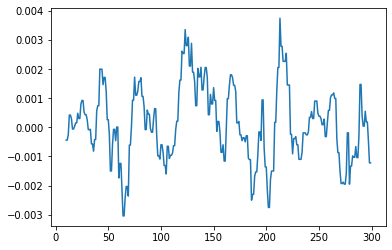

In [16]:
df.mom.plot();